In [4]:
from sklearn.model_selection import train_test_split

# Importamos librerias de arboles de decisiones
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Metricas
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("insurance.csv")
data

,number_of_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [6]:
data.shape

(63, 2)

## Exploracion de datos

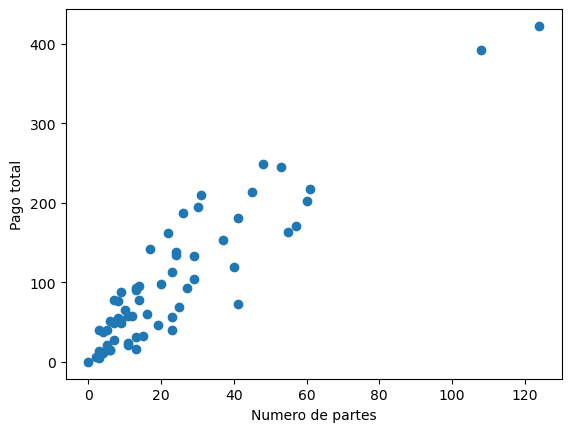

In [12]:
plt.scatter(data.number_of_claims, data.total_payment)
plt.xlabel("Numero de partes")
plt.ylabel("Pago total")
plt.show()

## Preprocesamiento de datos

In [13]:
# Seleccion de datos
x = data[["number_of_claims"]]
y= data["total_payment"]

# Particion de datos (entrenamiento y test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Creamos el modelo de regresion

In [44]:
# Creamos el modelo
reg = DecisionTreeRegressor(max_depth=3, random_state=0)

# Ajustamos el modelo
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

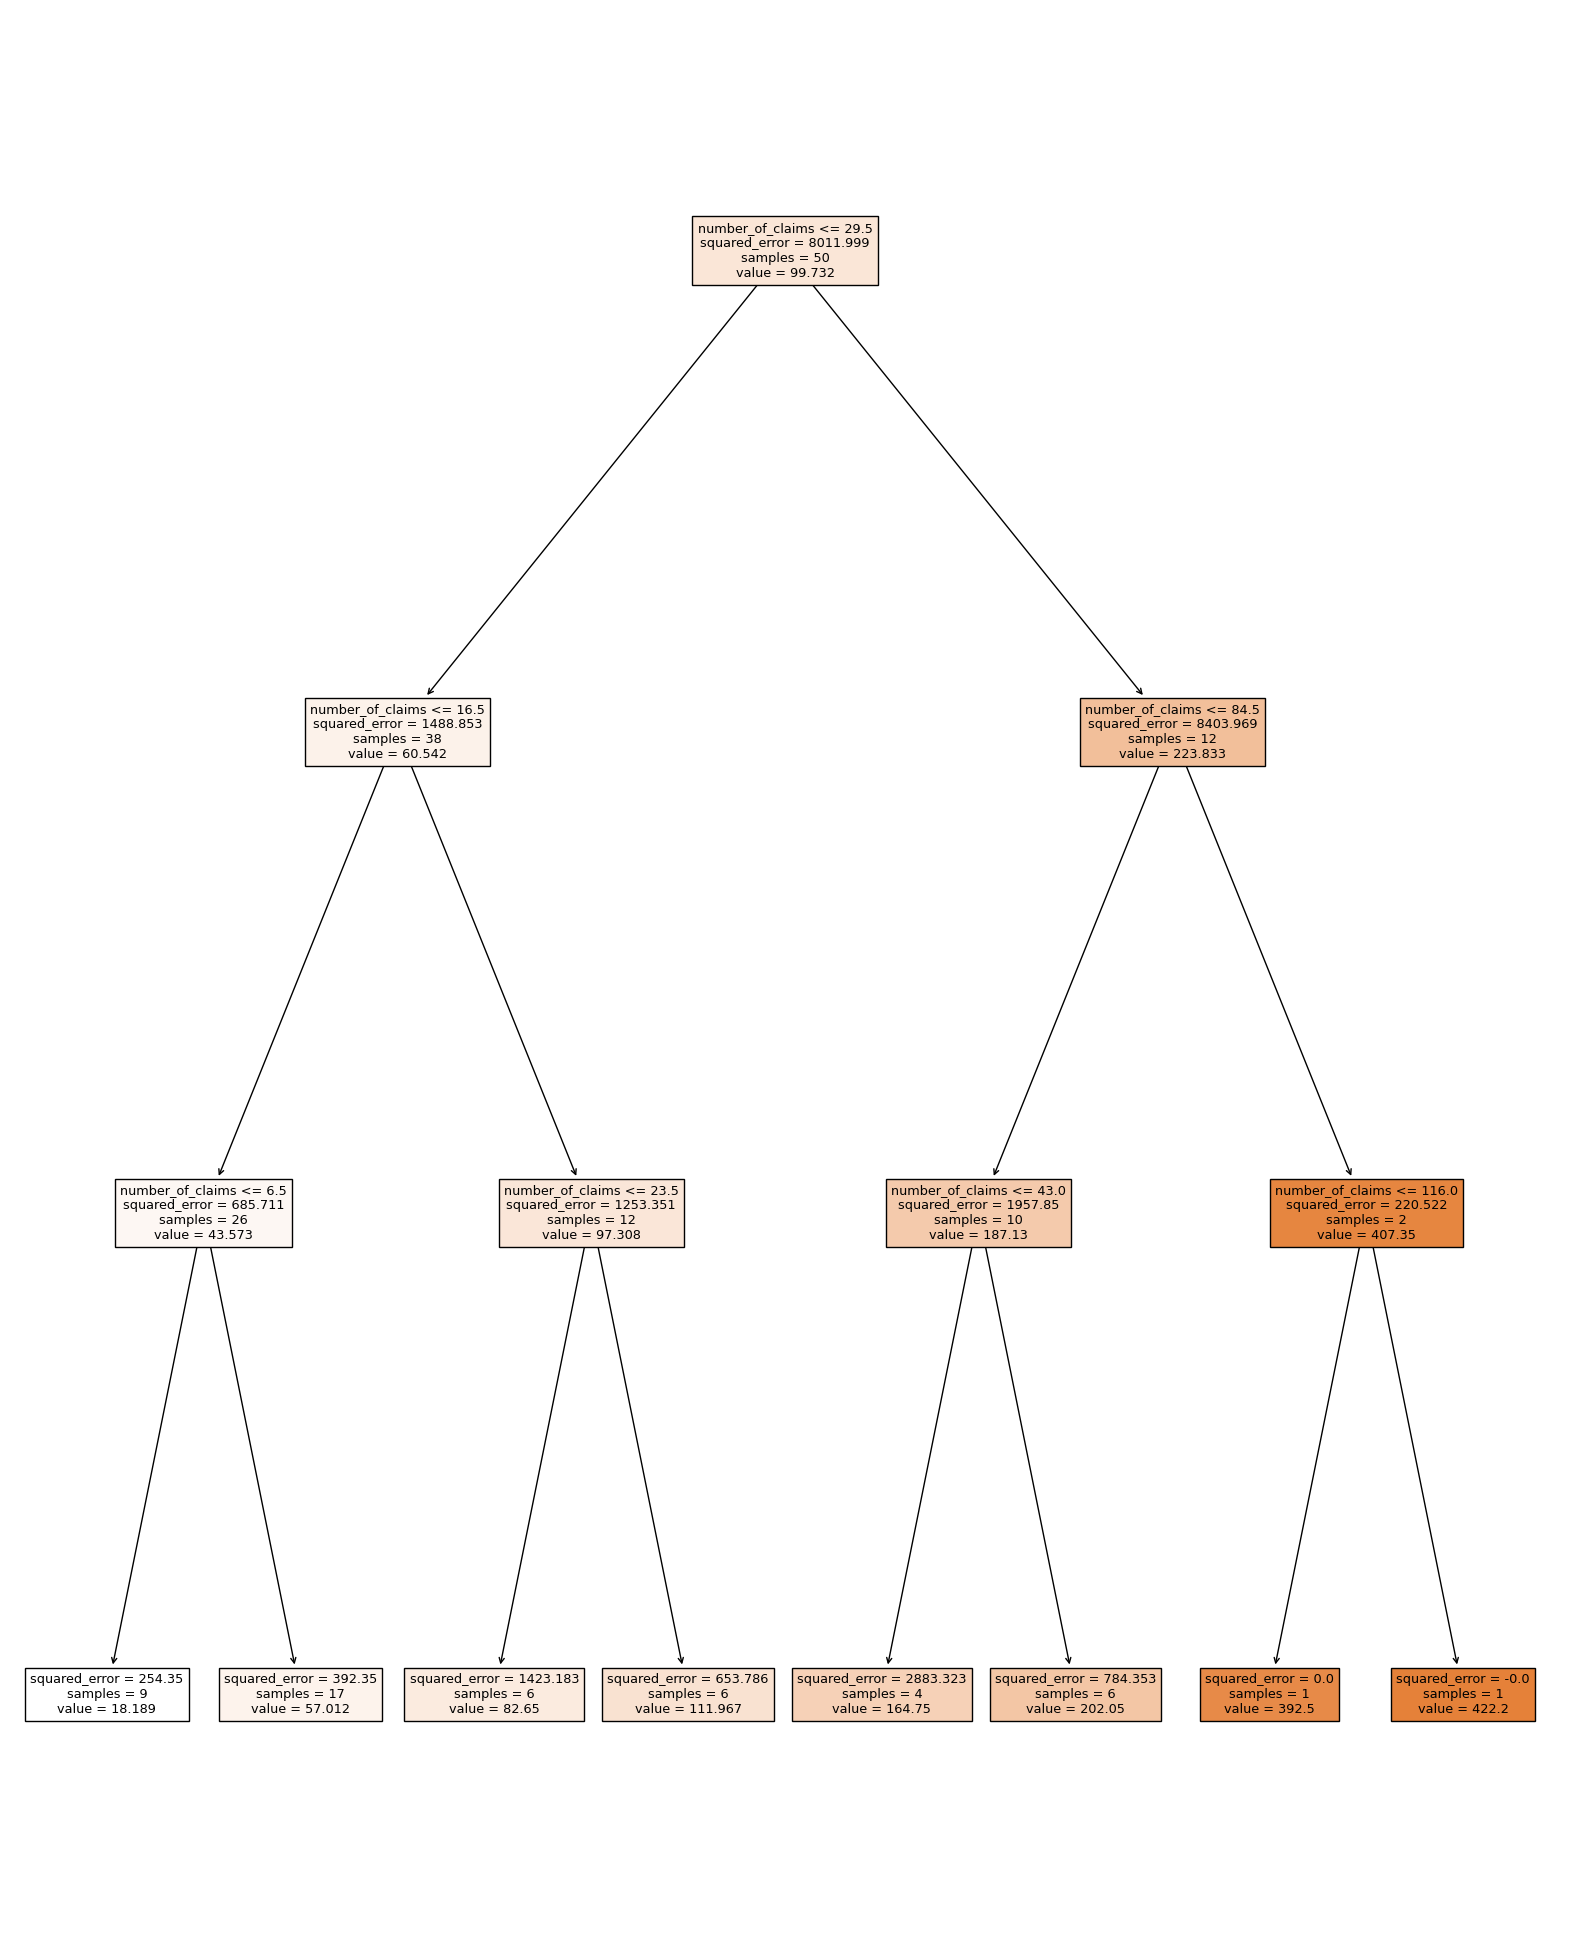

In [45]:
fig  = plt.figure(figsize=(20,25))
_ = tree.plot_tree(reg, feature_names=data.columns, filled=True)

## Prediccion de datos

In [46]:
y_pred = reg.predict(x_test)
y_pred

array([164.75      ,  18.18888889, 111.96666667,  57.01176471,
        18.18888889,  82.65      ,  18.18888889,  57.01176471,
       202.05      ,  57.01176471,  18.18888889,  57.01176471,
       164.75      ])

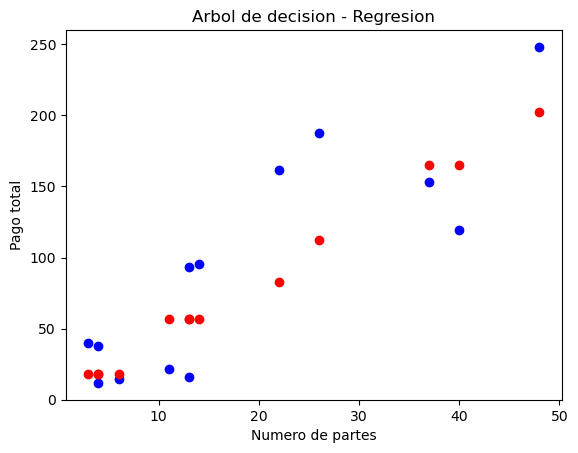

In [47]:
plt.scatter(x_test, y_test, color="blue")
plt.scatter(x_test, y_pred, color="red")
plt.title("Arbol de decision - Regresion")
plt.xlabel("Numero de partes")
plt.ylabel("Pago total")
plt.show()

## Validacion de resultados

In [48]:
df = pd.DataFrame(columns=["Valor Real", "Valor Predicho"])
df["Valor Real"] = y_test
df["Valor Predicho"] = y_pred
df["Diferencia"] = abs(df["Valor Real"] - df["Valor Predicho"])
df

,Valor Real,Valor Predicho,Diferencia
43,152.8,164.750000,11.950000
49,39.9,18.188889,21.711111
62,187.5,111.966667,75.533333
51,93.0,57.011765,35.988235
32,14.6,18.188889,3.588889
34,161.5,82.650000,78.850000
29,38.1,18.188889,19.911111
46,21.3,57.011765,35.711765
11,248.1,202.050000,46.050000
2,15.7,57.011765,41.311765


## Metricas

In [49]:
print("Raiz error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coeficiente de determinacion: ", round(r2_score(y_test, y_pred),2))

Raiz error cuadratico medio:  41.9914336847011
Coeficiente de determinacion:  0.68
